In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pyzbar.pyzbar import decode
from rich.console import Console

console = Console()

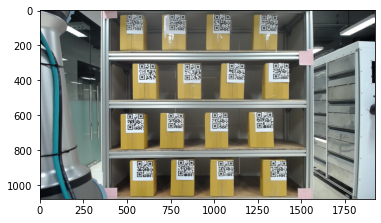

In [2]:
img = cv2.imread(r'C:\Users\bunth\OneDrive\Desktop\fra631\meta\picture\shelf03.png')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [3]:
def apply_brightness_contrast(input_img, brightness = 0, contrast = 0):
    
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow
        
        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()
    
    if contrast != 0:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1-f)
        
        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf

In [31]:
def preprocess(img, factor):
    # img = self.__apply_brightness_contrast(img, 0, 3)
    alpha = 1.2 # Contrast control (1.0-3.0)
    beta = 30 # Brightness control (0-100)
    kernel = np.array([[0, -1, 0],
                        [-1, 5,-1],
                        [0, -1, 0]])
    img = cv2.resize(img, None, fx=factor, fy=factor, interpolation=cv2.INTER_CUBIC)

    #img = cv2.GaussianBlur(img, (3, 3), 0)
    #img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # img = cv2.equalizeHist(img)

    # ground_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    # lower = np.array([0,200,200])
    # upper = np.array([20,255,255])
    # red = cv2.bitwise_and(img,img,mask=red_mask)
    # cv2.imshow('red',red)
    # red_mask = cv2.inRange(ground_hsv,lower,upper)


    #img = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
    # img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return img

In [7]:
import tkinter as tk
from math import sqrt
root = tk.Tk()
def resize_area_factor(img, area:float=.25):
    h, w = img.shape[:2]
    root = tk.Tk()
    screen_h = root.winfo_screenheight()
    screen_w = root.winfo_screenwidth()
    scaling_factor = 1
    if area != 0.0:
        vector = sqrt(area)
        window_h = screen_h * vector
        window_w = screen_w * vector
    else:
        return scaling_factor
    if h > window_h or w > window_w:
        if h / window_h >= w / window_w:
            scaling_factor = window_h / h
        else:
            scaling_factor =  window_w / w
    return scaling_factor

In [13]:
show_img = preprocess(img.copy())
scale_factor = resize_area_factor(show_img, .5)
show_img = cv2.resize(show_img, dsize=None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)
cv2.imshow('test', show_img)
cv2.waitKey(0)
cv2.destroyWindow('test')

In [38]:
factor = 1.5
new_img = preprocess(img=img.copy(), factor=factor)
decoded = decode(new_img)
#decoded = decode(img.copy())
show_img = new_img.copy()
for d in decoded:
    pts = d.polygon
    show_img = cv2.rectangle(show_img, (pts[0].x, pts[0].y), (pts[2].x, pts[2].y), color=(0, 0, 255), thickness=2)
show_img = cv2.resize(show_img, dsize=None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)
cv2.imshow('decoded', show_img)
cv2.waitKey(0)
cv2.destroyWindow('decoded')

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:1261: error: (-27:Null pointer) NULL window: 'decoded' in function 'cvDestroyWindow'


In [15]:
decoded

[]